# Means By Group

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy.optimize import minimize

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/bike.csv")

In [3]:
tbl = df.groupby(["weekday"])["cnt"].aggregate(np.mean)

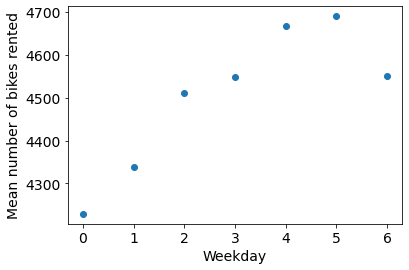

In [4]:
plt.scatter(np.unique(df["weekday"]), tbl.values)
plt.xlabel("Weekday");
plt.ylabel("Mean number of bikes rented");

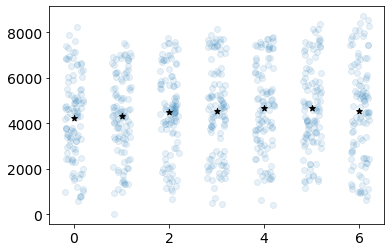

In [5]:
N = df.shape[0]
plt.scatter(df["weekday"] + np.random.uniform(-0.2, 0.2, size = N), 
            df["cnt"], alpha = 0.1)
plt.scatter(np.unique(df["weekday"]), tbl.values, 
            marker = "*", c = "black")

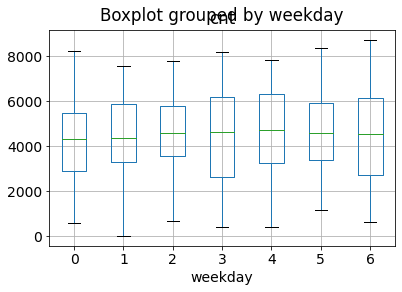

In [6]:
df.boxplot(column = "cnt", by="weekday");

In [7]:
tbl.values

array([4228.82857143, 4338.12380952, 4510.66346154, 4548.53846154,
       4667.25961538, 4690.28846154, 4550.54285714])

Because groups' (different weekdays') data do not overlap, we can calculate a mean for each group.  This is exactly what the code `df.groupby(["weekday"])["cnt"].aggregate(np.mean)` did.

However, we are here to practice more sophisticated methods, so let's do that.  There is an implicit optimization (minimization) problem going on here.  Assume there are $J$ groups.  Above, we have $7$ weekdays, so there are $J = 7$ groups.  The loss function is

$$loss(\beta | y) = \sum_{n = 1}^N (y_n - \beta_0 - \sum_{j=1}^{J-1} \beta_j * 1[y_n \text{ belongs to group j}] )^2$$

No doubt this is complicated.  It's simpler to remind yourself that this just says calculate means using only the data within each group (weekday).  The matrix `X` below helps us capture the data within each group.  In statistics circles, they will call this a model matrix or a design matrix.

In [8]:
X = [np.asarray(df["weekday"] == d) for d in np.unique(df["weekday"])];
X = np.transpose(np.asarray(X));
X = np.c_[X[:, 1:]];

In [9]:
data = {
    "X": X,
    "y": df["cnt"]
}
def loss(theta, data):
    return np.sum((data["y"] - theta[0] - data["X"] @ theta[1:]) ** 2)

In [13]:
out = minimize(loss, np.random.normal(size = np.shape(X)[1]+1),
               args = (data),
               method = "L-BFGS-B")
betahat = out["x"]

In [18]:
[betahat[0], [betahat[0] + betahat[i] for i in range(1, np.size(betahat))]]

[4227.930975541021,
 [4338.351056957244,
  4510.79699035118,
  4548.843619007722,
  4667.549491190118,
  4690.35269149228,
  4550.528579537785]]